Shape: (18, 6)
Columns: ['yearbuilt', 'improvval', 'landval', 'parval', 'usedesc', 'zoning']
          count unique                     top freq            mean  \
yearbuilt  18.0    NaN                     NaN  NaN     1986.777778   
improvval  18.0    NaN                     NaN  NaN   530131.111111   
landval    18.0    NaN                     NaN  NaN   764636.444444   
parval     18.0    NaN                     NaN  NaN  1294767.555556   
usedesc      18      5  Single Family Detached   10             NaN   
zoning       18     15                    RM-B    2             NaN   

                      std     min        25%       50%        75%         max  
yearbuilt       20.148144  1945.0    1975.75    1988.0     2000.5      2020.0  
improvval  1007124.386318     0.0   154952.5  237196.5   412714.0   4466988.0  
landval    2198356.439734     0.0  103423.25  260300.0  412828.75   9550872.0  
parval     3192783.025014     0.0  317599.75  576004.0   763425.5  14017860.0  
usedesc  

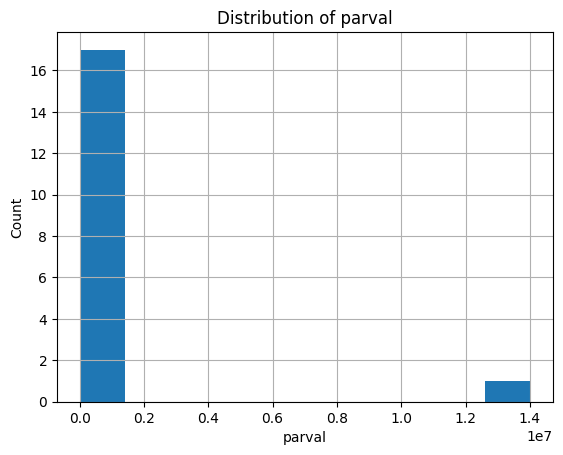

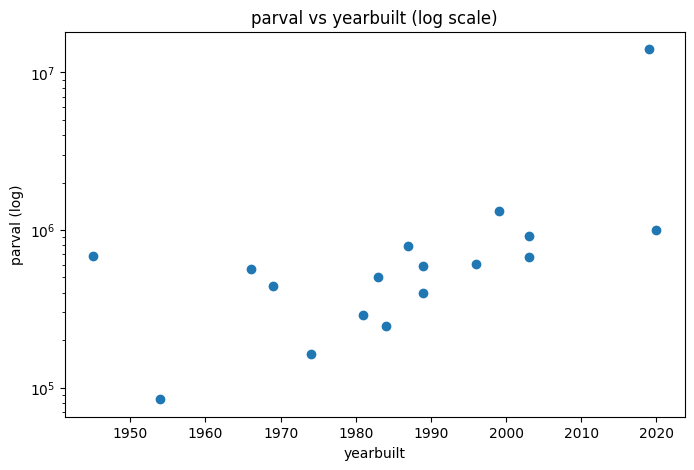

C:\Users\vsbom\AppData\Local\Temp\ipykernel_13776\4001003271.py:68: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


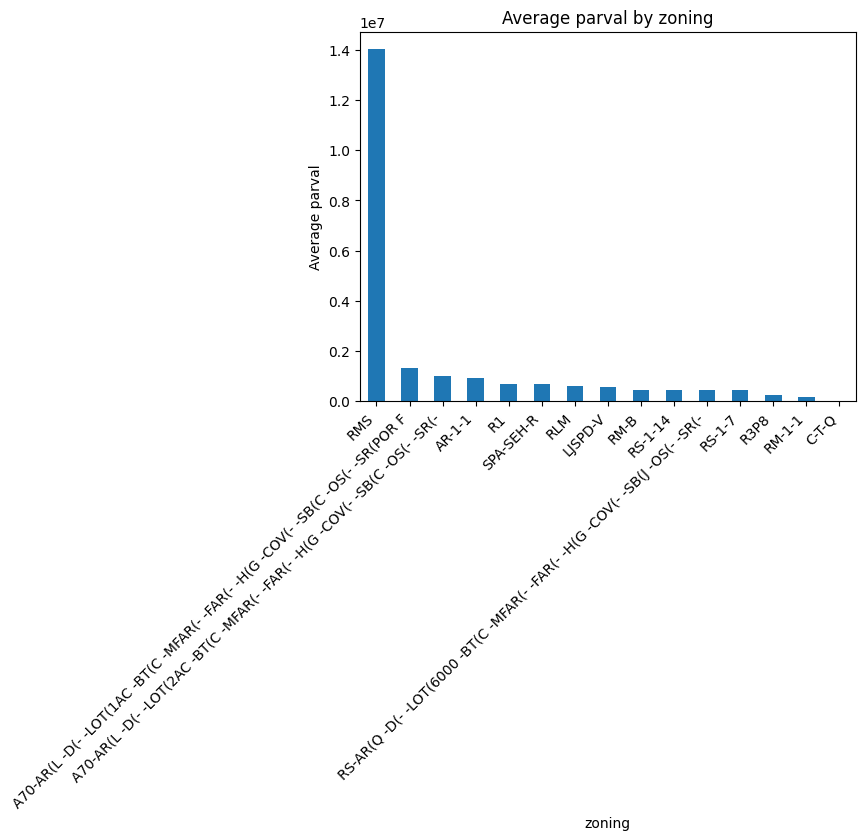

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/clean_housing_subset.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

print(df.describe(include="all").T)

if "parval" in df.columns:
    print("Average parval:", round(df["parval"].mean(), 2))
    print("Min parval:", df["parval"].min())
    print("Max parval:", df["parval"].max())

if "yearbuilt" in df.columns:
    print("Oldest yearbuilt:", int(df["yearbuilt"].min()))
    print("Newest yearbuilt:", int(df["yearbuilt"].max()))

# value_col represents numerical values (parval/landval)
if "parval" in df.columns:
    value_col = "parval"
elif "landval" in df.columns:
    value_col = "landval"
else:
    value_col = None 

if value_col:
    plt.figure()
    df[value_col].dropna().hist(bins=10)
    plt.title(f"Distribution of {value_col}")
    plt.xlabel(value_col)
    plt.ylabel("Count")
    plt.savefig("../figures/value_distribution.png", dpi=150, bbox_inches="tight")
    plt.show()
else:
    print("No parval or landval column found to plot")

if "yearbuilt" in df.columns and value_col:
    plt.figure(figsize=(8,5))
    plt.scatter(df["yearbuilt"],df[value_col])
    plt.yscale("log")
    plt.title(f"{value_col} vs yearbuilt (log scale)")
    plt.xlabel("yearbuilt")
    plt.ylabel(f"{value_col} (log)")
    plt.savefig("../figures/yearbuilt_vs_value.png", dpi=150, bbox_inches="tight")
    plt.show()
else:
    print("Need both 'yearbuilt' and a value column (parval/landval) for this plot.")

# cat_col represents categorical values (zoning/usedesc)
if "zoning" in df.columns:
    cat_col = "zoning"
elif "usedesc" in df.columns:
    cat_col = "usedesc"
else:
    cat_col = None

if cat_col and value_col:
    grouped = df.groupby(cat_col)[value_col].mean().sort_values(ascending=False)

    plt.figure()
    grouped.plot(kind="bar")
    plt.title(f"Average {value_col} by {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel(f"Average {value_col}")
    plt.xticks(rotation=45, ha="right")
    plt.savefig("../figures/avg_value_by_category.png", dpi=150, bbox_inches="tight")
    plt.show()
else:
    print("Need a category column (zoning/usedesc) and a value column (parval/landval).")
